# Logistic Regression
- $\sigma(x) = \frac{1}{1 + e^{-x}}$
- $\sigma(x)$ gives probability

- Recall: $f(X) = b_0 + b_1 x$
- $\sigma(f(x)) = \frac{1}{1 + e^{-f(x)}}$
- $\sigma(x) = \frac{1}{1 + e^{-(b_0 + b_1 x)}}$

- If the bias changes it is going to shift the sigmoid function left or right on the graph.
- If the weight changes it makes it steeper or more shallow, can referse the sigmoid function if it goes far enough negative. 

# How to train a logistic regression model
- $J(\vec{b}) = -log(1-f(x))$ if y = 0
- $J(\vec{b}) = -log(f(x))$ if y = 1
- $J(\vec{b}) = -[Y log(f(X)) + (1 - y)log(1 - f(X))]$
- $\vec{x}$ = values
- $\vec{y}$ = 1 or 0
- $f(x) = b_0 + b_1 x$

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

titanic = sns.load_dataset('titanic')

In [2]:
X = titanic['pclass'].values
Y = titanic['survived'].values

X_bar = X - X.mean()
Y_bar = Y - Y.mean()

b1 = X_bar.dot(Y_bar) / X_bar.dot(X_bar)
b0 = Y.mean() - b1 * X.mean()

print(f"y = {b0:0.3f} + {b1:0.3f}x")

y = 0.839 + -0.197x


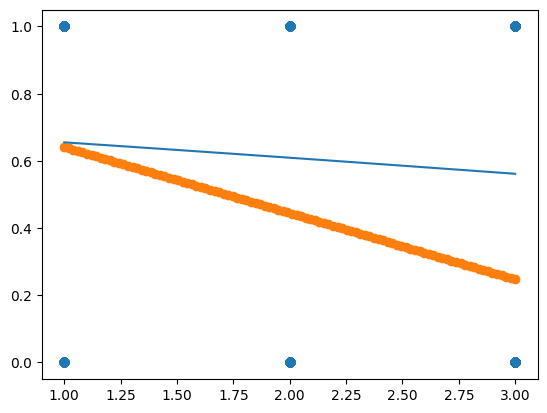

In [3]:
plt.scatter(X,Y)

X_test = np.linspace(1,3,100)
Y_test = b0 + b1 * X_test

# Linear Regressio Model
plt.scatter(X_test, Y_test)

# Logistic Regression Model
Y_logistic = 1 / (1 + np.exp(-b0 - b1*X_test))
plt.plot(X_test, Y_logistic)

# Gradient Descent
- Taking the slope and following it down a little bit and doing it over and over again until you hit the point that you want to hit, take small steps towards the actual result.
- $J(\vec{b}) = -[Y log(\hat{p}) + (1 - y)log(1 - \hat{p})]$
- $\hat{p} = \sigma(b_0 + b_1 x)$
- $\sigma(x) = \frac{1}{1 + e^{-x}}$
- $\hat{p} = \frac{1}{1 + e^{-(b_0 + b_1 x)}}$
- $db = \frac{\alpha J}{\alpha b_0} = \frac{1}{m} \sum{(\hat{p^i} - y^i)}$
- $dw = \frac{\alpha J}{\alpha b_1} = \frac{1}{m} \sum{(\hat{p^i} - y^i)}x^i = \frac{1}{m}[(\hat{p^i} - y^i)] * X$
- $b_0 = b_0 - a * db$ where a is the learning rate
- $b_1 = b_1 - a * dw$ where a is the learning rate

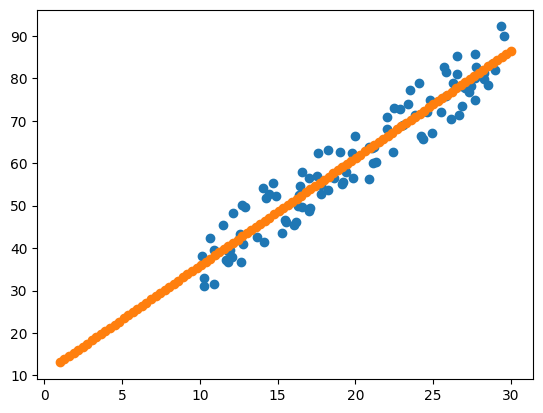

In [4]:
X = np.random.rand(100)*20 + 10
Y = 2.5 * X + 4 + np.random.rand(100) * 15

plt.scatter(X,Y)

X_bar = X - X.mean()
Y_bar = Y - Y.mean()

b1 = X_bar.dot(Y_bar) / X_bar.dot(X_bar)
b0 =  Y.mean() - b1 * X.mean()

X_test = np.linspace(1,30,100)
Y_test = b0 + b1 * X_test

plt.scatter(X_test, Y_test)


In [5]:
class Logistic_Regression():
    def __init__(self, learning_rate, num_iters):
        self.learning_rate = learning_rate
        self.num_iters = num_iters

    def fit(self, X, Y):
        self.X = X
        self.Y = Y
        self.M = len(X) # Number of observations

        # Initialize weight and bias
        X_bar = self.X - self.X.mean()
        Y_bar = self.Y - self.Y.mean()
        self.b1 = X_bar.dot(Y_bar) / X_bar.dot(X_bar)
        self.b0 = self.Y.mean() - self.b1 * self.X.mean()

        for i in range(self.num_iters):
            self.update_weights()

    def update_weights(self):
        P_hat = 1 / (1 + np.exp(-(self.b0 + self.b1 * self.X)))

        db = (P_hat - self.Y).sum() / self.M
        dw =  (P_hat - self.Y).dot(self.X) / self.M
        
        self.b1 = self.b1 - self.learning_rate * dw
        self.b0 = self.b0 - self.learning_rate * db 

    def predict(self, new_X): 
        Y_prob = 1 / (1 + np.exp( -(self.b0 + self.b1 * new_X) ))
        Y_pred = np.where(Y_prob > 0.5, 1, 0)
        return Y_prob, Y_pred

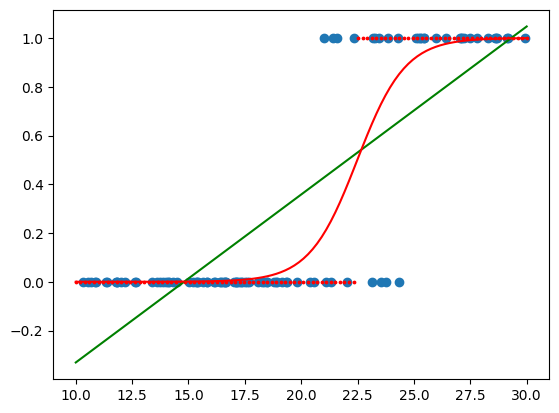

In [6]:
X = np.random.rand(100)*20 + 10
y = 2.5*X + 4 + np.random.random(100)*15


X_bar = X - X.mean()
y_bar = y - y.mean()
x_test = np.linspace(10, 30, 100)

b1 = X_bar.dot(y_bar)/X_bar.dot(X_bar)
b0 = y.mean() - b1 * X.mean()

z = (y >= 70)
plt.scatter(X, z)

z_bar = z - z.mean()

b1 = X_bar.dot(z_bar)/X_bar.dot(X_bar)
b0 = z.mean() - b1 * X.mean()

plt.plot(x_test, b0+b1*x_test, c='green')


# Now the model
X_scaled = (X - X.min()) / (X.max() - X.min())

log_reg = Logistic_Regression(learning_rate=30, num_iters=1000)
log_reg.fit(X_scaled, z)

# Plot results of the model
x_test_scaled = (x_test - X.min()) / (X.max() - X.min())
z_prob, z_pred = log_reg.predict(x_test_scaled)

plt.plot(x_test, z_prob, c='red')
plt.scatter(x_test, z_pred, c='red', s=3)